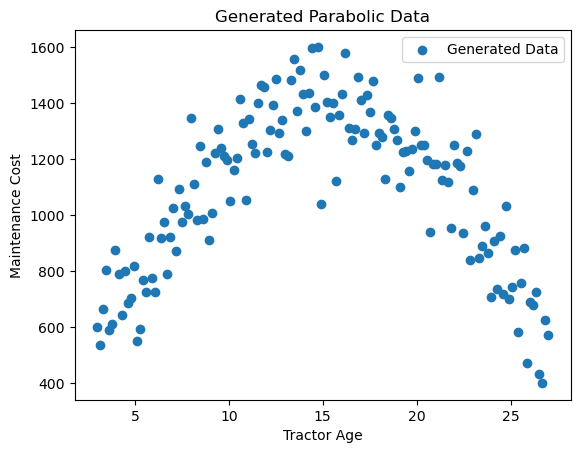

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# Set seed for reproducibility
np.random.seed(42)

# Generate x values within the range seen in the image
x_parabolic = np.linspace(3, 27, 150)

# Define the parabolic function y = ax^2 + bx + c
a, b, c = -20, 600, 3000  # Coefficients approximating the trend in the image
noise = np.random.normal(0, 450, size=x_parabolic.shape)  # Adding noise

# Compute y values
y_parabolic = a * x_parabolic**2 + b * x_parabolic + c + noise

# Scale y values to range from 400 to 1600
y_min, y_max = 400, 1600
y_parabolic = (y_parabolic - np.min(y_parabolic)) / (np.max(y_parabolic) - np.min(y_parabolic))  # Normalize to 0-1
y_parabolic = y_parabolic * (y_max - y_min) + y_min  # Scale to range [400, 1600]

# Plot the generated dataset to ensure it resembles the uploaded image
plt.scatter(x_parabolic, y_parabolic, label="Generated Data")
plt.title("Generated Parabolic Data")
plt.xlabel("Tractor Age")
plt.ylabel("Maintenance Cost")
plt.legend()
plt.show()

# Prepare X and Y arrays for use
X = x_parabolic.tolist()
y = y_parabolic.tolist()

 Mean Squared Error: 15580.430203954318
 Mean Absolute Error: 102.37963058494613
 Root Mean Absolute Error: 124.82159350030074
 R-squared: 0.7998989163623847


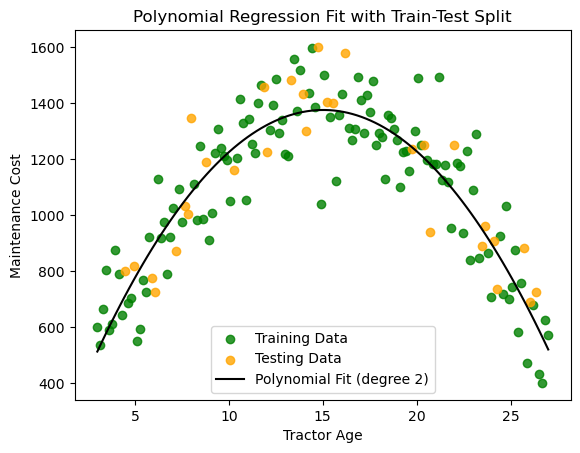

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

X = np.array(X).reshape(-1, 1)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_test_pred = model.predict(X_test_poly)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f" Mean Squared Error: {test_mse}")
print(f" Mean Absolute Error: {test_mae}")
print(f" Root Mean Absolute Error: {test_rmse}")
print(f" R-squared: {test_r2}")

plt.scatter(X_train, y_train, label="Training Data", color="green", alpha=0.8)
plt.scatter(X_test, y_test, label="Testing Data", color="orange", alpha=0.8)
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = model.predict(poly.transform(X_plot))
plt.plot(X_plot, y_plot, color="black", label=f"Polynomial Fit (degree {2})")
plt.title("Polynomial Regression Fit with Train-Test Split")
plt.xlabel("Tractor Age")
plt.ylabel("Maintenance Cost")
plt.legend()
plt.show()
